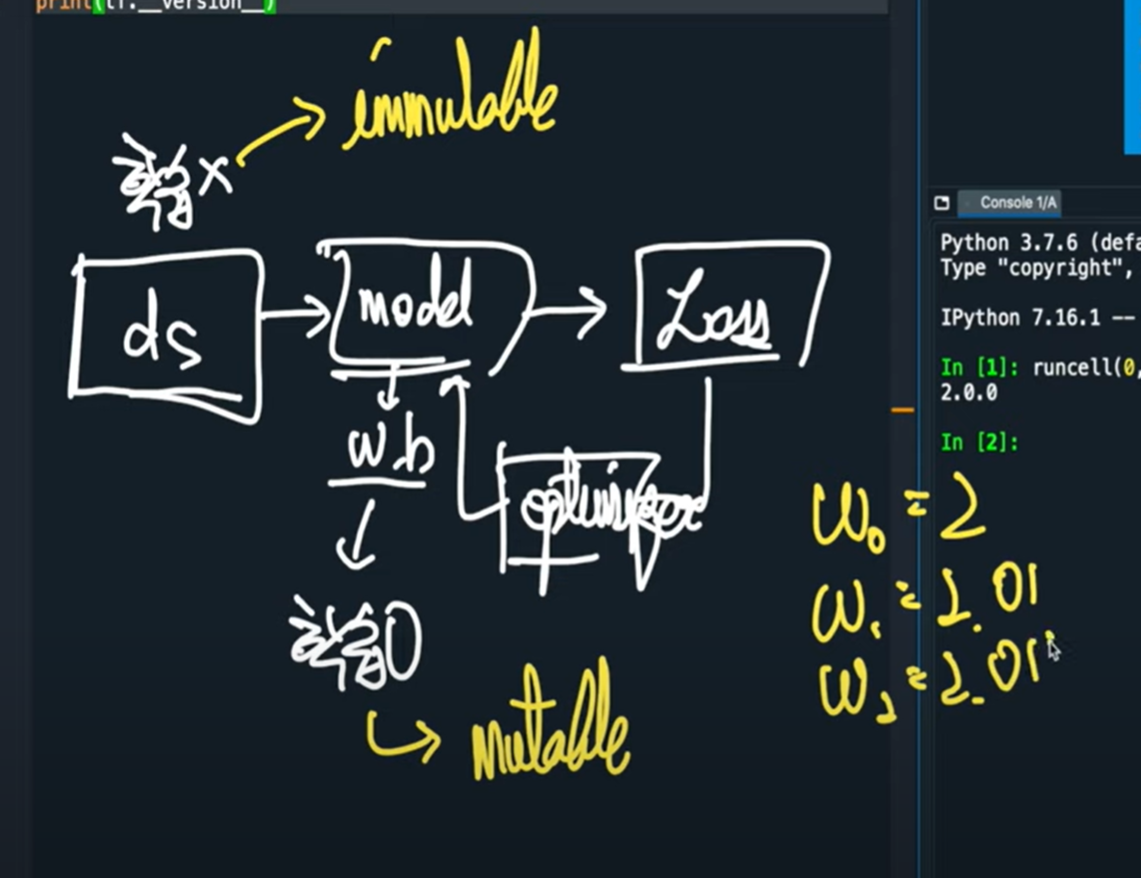

data set(학습이 필요없는 immutable object) -> model(w,b 같은 trainable/learnable parameter)(학습이 필요한 mutable object) -> loss 계산 -> optimizer -> model

1. tf.Variable(mutable tensor) # ResourceVariable
2. tf.constant/tf.convert_to_tensor(immutable tensor) # EagerTensor

In [18]:
import tensorflow as tf

t1 = tf.Variable([1,2,3])
t2 = tf.constant([1,2,3])

print(type(t1))
print(type(t2))

<class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


python list / numpy array -> tensorflow의 tensor(tf.Variable / tf.constant)

In [19]:
import numpy as np

test_list = [1,2,3]
test_np = np.array([1,2,3])

t1 = tf.constant(test_list)
t2 = tf.constant(test_np)
t3 = tf.Variable(test_list)
t4 = tf.Variable(test_np)

print(type(t1))
print(type(t2))
print(type(t3))
print(type(t4))

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>
<class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>


tf.constant + tf.Variable = tf.constant  
tf.Variable + tf.Variable = tf.constant

In [20]:
test_list1 = [1,2,3]
test_list2 = [4,5,6]

t1 = tf.constant(test_list1)
t2 = tf.Variable(test_list1)
t3 = tf.Variable(test_list2)

t4 = t1 + t2
t5 = t2 + t3

print(type(t4))
print(type(t5))

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


tensor를 만드는 과정은 numpy와 닮았다

In [21]:
# 행,열 1로 채우기
t1 = tf.ones(shape=(100,))
t2 = tf.ones(shape=(100,3)) 
t3 = tf.ones(shape=(128,128,128)) 

In [22]:
# 행,열 0로 채우기
t1 = tf.zeros(shape=(128,128,128)) 

In [23]:
# 행,열 3.14로 채우기
t1 = 3.14 * tf.ones(shape=(128,128,128)) # 스칼라 X 벡터(tensor)

In [24]:
# 똑같은 shape을 가진 tensor 만들기(둘 중 어떤걸 사용해도 상관없음)
test_list = [[1,2,3],[4,5,6]]
t1 = tf.Variable(test_list)

t2 = tf.ones(shape=t1.shape)
t2 = tf.ones_like(t1)

In [25]:
# 행,열 random하게 채우기
tf.random.set_seed(0) # random seed 사용시
t1 = tf.random.normal(shape=(10,10))
t2 = tf.random.normal(mean=3, stddev=1, shape=(1000,)) # 평균 3, 표준편차 1
t3 = tf.random.uniform(shape=(10000,), minval=-10, maxval=10)
t4 = tf.random.poisson(shape=(1000,), lam=5)

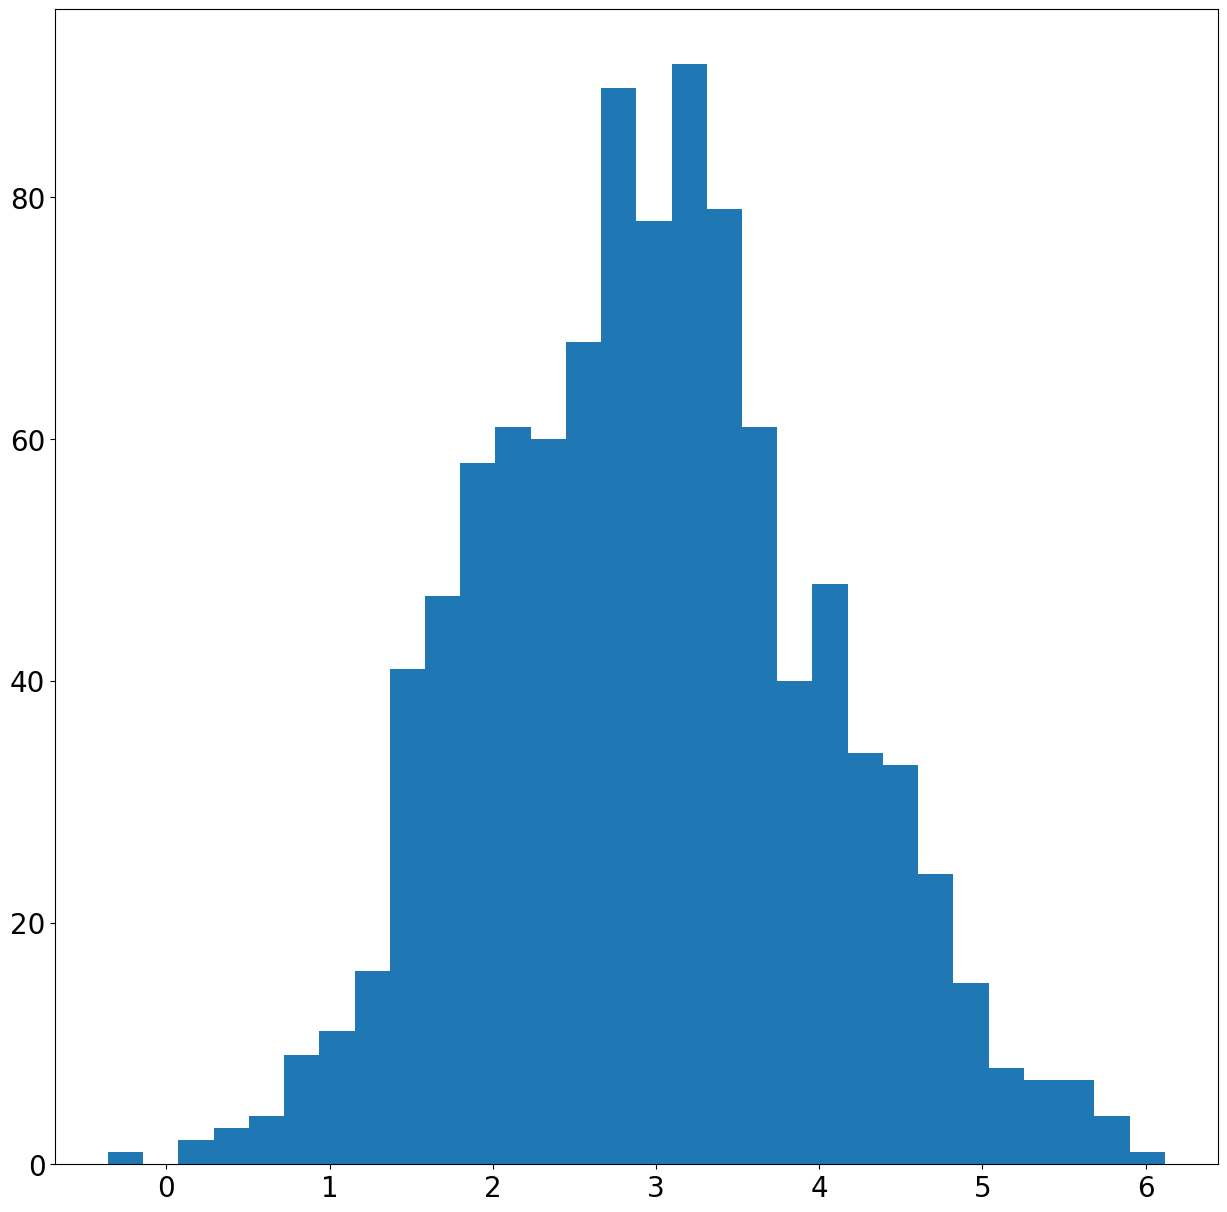

In [26]:
# 그려보기
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15))
ax.hist(t2.numpy(), bins=30)
ax.tick_params(labelsize=20)

In [27]:
# 정보 출력하기
print("t1.shape: ", t1.shape)
print("t1.dtype: ", t1.dtype) # float 32이어야 에러가 안 생긴다

t1.shape:  (10, 10)
t1.dtype:  <dtype: 'float32'>


In [28]:
# 데이터 타입 정해주기
test_np = np.random.randint(-10, 10, size=(100,))
t1 = tf.constant(test_np, dtype=tf.float32)

In [29]:
# 데이터 타입 바꿔주기
t1 = tf.random.normal(shape=(3,4), mean=0, stddev=5)
t1 = tf.cast(t1, dtype=tf.int16)

print(t1.numpy()) # numpy로 바꿔주기

[[ 8 12 -5 -1]
 [-2 -6  2 -3]
 [ 6  6  2  7]]


tensor 연산

In [30]:
python_list1 = [1,2,3]
python_list2 = [10,20,30]
print(python_list1 + python_list2)

t1 = tf.constant([1,2,3])
t2 = tf.constant([10,20,30])
print(t1 + t2) # element wise 연산

[1, 2, 3, 10, 20, 30]
tf.Tensor([11 22 33], shape=(3,), dtype=int32)


In [31]:
#shape이 틀릴 때 broadcasting(shape 맞춰주기)
t1 = tf.random.normal(shape=(3,4), mean=0, stddev=5)
t2 = tf.random.normal(shape=(1,4), mean=0, stddev=5)

t1 = tf.cast(t1, dtype=tf.int16)
t2 = tf.cast(t2, dtype=tf.int16)

t3 = t1 + t2 # t2를 3x4로 expansion 해주고 더하기

print(t1.numpy(), '\n')
print(t2.numpy(), '\n')
print(t3.numpy(), '\n')


t1 = tf.random.normal(shape=(3,1), mean=0, stddev=5)
t2 = tf.random.normal(shape=(1,4), mean=0, stddev=5)

t1 = tf.cast(t1, dtype=tf.int16)
t2 = tf.cast(t2, dtype=tf.int16)

t3 = t1 + t2 # t1,t2를 3x4로 expansion 해주고 더하기

print(t1.numpy(), '\n')
print(t2.numpy(), '\n')
print(t3.numpy(), '\n')

[[-5 -3 -1  9]
 [-2 -2 -3  1]
 [ 3  7 -5  1]] 

[[11  4  0  1]] 

[[ 6  1 -1 10]
 [ 9  2 -3  2]
 [14 11 -5  2]] 

[[-2]
 [ 2]
 [ 0]] 

[[ 4  3 -1 -3]] 

[[ 2  1 -3 -5]
 [ 6  5  1 -1]
 [ 4  3 -1 -3]] 



In [32]:
# reduce family
t1 = tf.random.normal(shape=(3,4), mean=0, stddev=5)
t1 = tf.cast(t1, dtype=tf.int16)
print(t1.numpy())

t2 = tf.reduce_sum(t1) # 모든 element 합
print(t2.numpy())
t2 = tf.reduce_sum(t1, axis=0) # shpae=(3(axis=0),4(axis=1))에서 axis=0 축(데이터) 없애면서 더하기(각 특성의 모든 합)
print(t2.numpy())
print(t2.shape)
t2 = tf.reduce_sum(t1, axis=1) # shpae=(3(axis=0),4(axis=1))에서 axis=1 축(특징) 없애면서 더하기(각 데이터의 모든 합)
print(t2.numpy())
print(t2.shape)

[[ 6  2  4 12]
 [-3 -3  0 -2]
 [ 2  2  0 -4]]
16
[5 1 4 6]
(4,)
[24 -8  0]
(3,)


tf.GradientTape(): 순전파(forward propagation, model -> loss)를 기록해놓은 tape로 이후 역전파(back propagation)에 도움을 준다

In [33]:
t1 = tf.Variable([1,2,3], dtype=tf.float32)
t2 = tf.Variable([10,20,30], dtype=tf.float32)

with tf.GradientTape() as tape:
    t3 = t1 * t2
    t4 = t3 + t2

gradients = tape.gradient(t4, [t1, t2, t3])

print('dt1: ', gradients[0])
print('dt2: ', gradients[1])
print('dt3: ', gradients[2])

dt1:  tf.Tensor([10. 20. 30.], shape=(3,), dtype=float32)
dt2:  tf.Tensor([2. 3. 4.], shape=(3,), dtype=float32)
dt3:  tf.Tensor([1. 1. 1.], shape=(3,), dtype=float32)


In [34]:
t1 = tf.constant([1,2,3], dtype=tf.float32)
t2 = tf.Variable([10,20,30], dtype=tf.float32)

with tf.GradientTape() as tape:
    t3 = t1 * t2

gradients = tape.gradient(t3, [t1, t2])

print('dt1: ', gradients[0]) # constant의 경우 역전파(update)가 일어날 필요가 없음
print('dt2: ', gradients[1])

dt1:  None
dt2:  tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)


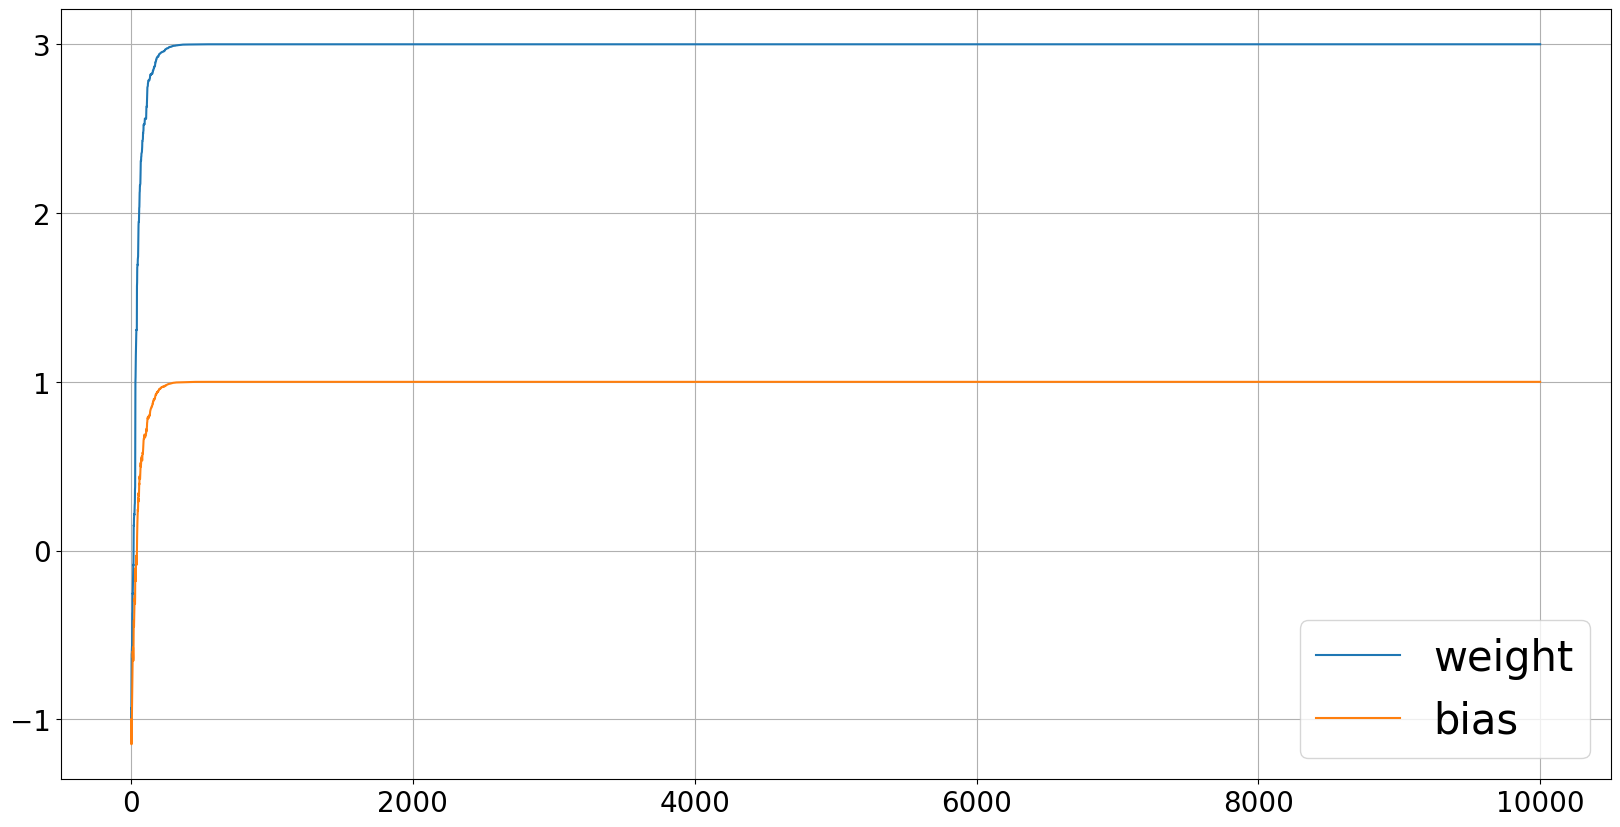

In [41]:
# 간단한 선형회귀 딥 러닝

# 데이터
x_data = tf.random.normal(shape=(1000,), dtype=tf.float32)
y_data = 3*x_data + 1

# 가중치와 절편
w = tf.Variable(-1.)
b = tf.Variable(-1.)

EPOCHS = 10 # learning rate 10번 돌리기
LR = 0.01

w_trace, b_trace = [], []

for epoch in range(EPOCHS):
    for x,y in zip(x_data,y_data):
        with tf.GradientTape() as tape: # forward propagation
            prediction = w*x + b # model
            loss = (prediction-y)**2 # loss
        gradients = tape.gradient(loss, [w,b])

        w_trace.append(w.numpy())
        b_trace.append(b.numpy())
        
        w = tf.Variable(w - LR*gradients[0])
        b = tf.Variable(b - LR*gradients[1])

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(w_trace, label='weight')
ax.plot(b_trace, label='bias')
ax.tick_params(labelsize=20)
ax.legend(fontsize=30)
ax.grid()